<html><body><br><div align="center"><font size="3"><ul> <a href="FADO_QuickStartGuide.ipynb">pyFADO Start Guide</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part1_Execute.ipynb">1. Start FADO</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part2_Execute.ipynb">2. Running FADO</a> &nbsp;&nbsp; | &nbsp;&nbsp; <a href="FADO_Part3_Plots.ipynb" style="color:red">3. Reading & Plotting FADO results</a></li></ul></font><br></div><div align="right">Jean Gomes @ 2019</div></body></html>

THIS DOCUMENT CONTAINS:<br><br>

<div style="border:1px solid #000;">
&#9679; 3 - Obtaining and plotting the results from your FADO fit
<pre>
    | 3.1 - Stellar populations properties of FADO
    | 3.2 - Kinematics of stellar populations obtained with FADO
    | 3.3 - Emission-line module (still under construction, it will be released soon).
    | 3.4 - Producing automatic plots with pyFADO</pre>
</div>

<br><font color='purple' size='5'>&#9679; 3 - Obtaining and plotting the results from your FADO fit</font>


Following section '2.1 - "Simpler" FADO output', we will show how to obtain the basic results from the FADO fits. This is the <font color="green"><b>beta version</b></font> if you have any questions, improvements or bugs please send to jean@iastro.pt.

3.1 - Stellar populations properties of FADO

* Mean stellar age (light and mass-weighted)
* Mean stellar metallicity (light and mass-weighted)
* Stellar mass
* Extinction in the V-band

3.2 - Kinematics of stellar populations obtained with FADO

* Systemic velocity
* Velocity dispersion
* Redshift (it is advisable to fit galaxies in the rest-frame corrected, so this is a minor correction)

3.3 - <font color="red">Emission-line module (still under construction, it will be released soon).</font>

There are two python modules that you can import. These are python classes for reading/plotting the output FITS (Flexible Image Transport System) produced by FADO (see section 2.). 

Revisiting, the automatic fits files produced are:

galaxy_1D.fits -> One dimensional spectra<br>
galaxy_EL.fits -> Emission-lines<br>
galaxy_DE.fits -> Differential evolution<br>
galaxy_ST.fits -> Statistics file<br>

However, one does not need to know in detail their content. It is sufficient to import and easier to import using:

- ReadFADOFitsv01.py
- PlotFADOv01.py

In [1]:
# First import the libraries containing the classes
from ReadFADOFitsv01 import ReadFADOFits
from PlotFADOv01 import PlotFADO

Taking the example of the blue compact dwarf galaxy run in section 2. 0266.51630.100.7xt then we have the following outputs:

In [2]:
%%bash
ls 0266.51630.100.7xt*.fits

0266.51630.100.7xt.FADO_1D.fits
0266.51630.100.7xt.FADO_DE.fits
0266.51630.100.7xt.FADO_EL.fits
0266.51630.100.7xt.FADO_ST.fits


In [3]:
# Define path & name of the file without extensions _1D.fits, _DE.fits, _EL.fits & _ST.fits
path ='./'
name = '0266.51630.100.7xt.FADO'

# showheader if True prints the header of the files
# It is still experimental, i.e. in the beta version, but it is seems to be working...
galaxy_0266_51630_100 = ReadFADOFits( name, path=path, showheader=False )

File info from FADO: _1D.fits extension
Filename: ./0266.51630.100.7xt.FADO_1D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   (7001, 19)   float32   
None
Naxis1: 7001 x Naxis2: 19 pixels

File info from FADO: _DE.fits extension
Filename: ./0266.51630.100.7xt.FADO_DE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   (107, 43)   float32   
None
Naxis1: 107 x Naxis2: 43 pixels

File info from FADO: _ST.fits extension
Filename: ./0266.51630.100.7xt.FADO_ST.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     230   (7, 100)   float32   
None
Naxis1: 7 x Naxis2: 100 pixels


<br><font color='purple' size='5'>&#9679; 3.1 - Stellar populations properties of FADO</font>

After reading the fits files (section above), one has stored several variables, but what if I just want <font color="red"><b>a simpler set of stellar population properties</a></font>? Then you just need to:

In [4]:
# Invoke the object with the method SimplerFADOStellarPopulations()
galaxy_0266_51630_100.SimplerFADOStellarPopulations( )

... Compact information regarding the stellar populations:

... Mean stellar age
... Mean stellar age light-weighted                       : 2.216e+06 [yr] or  0.00222 [Gyr]
... Mean stellar age mass-weighted                        : 2.32e+06 [yr] or  0.00232 [Gyr]
... Mean stellar logarithmic age light-weighted           : 6.33200
... Mean stellar logarithmic age mass-weighted            : 6.34200
... Mean stellar metallicity
... Mean stellar metallicity light-weighted               : 0.03602        or  1.80100 [Z_solar]
... Mean stellar metallicity mass-weighted                : 0.02215        or  1.10750 [Z_solar]

... Total stellar masses
... Log of total stellar mass presently available (corr.) : 5.24800 [Solar masses]
... Log of total stellar mass ever formed (not-corrected) : 5.25200 [Solar masses]

... Extinction
... Stellar extinction in the V-band                      : 0.96170 +/- 1.482e-07
... Nebular extinction in the V-band                      : 0.96170 +/- 1.482e-07
...

We have all the basic information printed concerning the mean stellar ages & metallicities, stellar masse and the extinction in the V-band. But, do you remember that we have read the FITs files and everything is stored in the "galaxy_0266_51630_100" object? They can be printed as below:

In [5]:
# Mean stellar age light-weighted [years]
galaxy_0266_51630_100.mean_stellar_age.light

2216000.0

In [6]:
# Mean stellar age light-weighted [years]
galaxy_0266_51630_100.mean_stellar_age.mass

2320000.0

In [7]:
galaxy_0266_51630_100.mean_stellar_metallicity.light

0.03602

In [8]:
galaxy_0266_51630_100.mean_stellar_metallicity.mass

0.02215

In [9]:
# Continuum extinction in the V-band in magnitudes
galaxy_0266_51630_100.AV_extinction

0.9617

In [10]:
# Nebular extinction in the V-band in magnitudes (It may or not be equal to the continuum depends on the fitting)
galaxy_0266_51630_100.AV_extinction_nebular

0.9617

In [11]:
# Stellar mass corrected for the return to the ISM
galaxy_0266_51630_100.log_stellar_mass.corrected

5.248

In [12]:
# Stellar mass not corrected for the return to the ISM, i.e. the ever formed stellar mass
galaxy_0266_51630_100.log_stellar_mass.ever

5.252

<br><font color='purple' size='5'>&#9679; 3.2 - Kinematics of stellar populations obtained with FADO</font>

After reading the fits files (section above), one has stored several variables, but what if I just want <font color="red"><b>a simpler set of kinematical values from the stellar population properties</a></font>? Then you just need to:

In [13]:
# Invoke the object with the method SimplerFADOKinematics()
galaxy_0266_51630_100.SimplerFADOKinematics( )

... Compact information regarding the kinematics of stellar populations:

... Systemic velocity
... Systemic velocity (non-relativistic correction)       : -20.83431 [km/s]
... Systemic velocity (    relativistic correction)       : -20.83503 [km/s]
... Velocity dispersion                                   : 105.40000 [km/s]
... First redshift estimation                             : -2.19600e-04 
... Final redshift (correction due to the fitting)        : -6.94958e-05 



And again I can obtain the values from the object by typing:

In [14]:
# Systemic velocity in [km/s]
galaxy_0266_51630_100.redshift.velocity

-20.83430797278703

In [15]:
# Velocity dispersion in [km/s]
galaxy_0266_51630_100.velocity_dispersion

105.4

In [16]:
# Redshift
galaxy_0266_51630_100.redshift.value

-6.949577088022352e-05

<br><font color='purple' size='5'>&#9679; 3.3 - Emission-line module</font> <font color="red" size='5'>(still under construction, it will be released soon under preparation)</font>

<br><font color='purple' size='5'>&#9679; 3.4 - Producing automatic plots with pyFADO</font>

We can also produce easily a plot. This module is experimental and is in the beta version.

Number of ELs: 48
48 48 48
Metallicities: [0.004 0.008 0.02  0.05 ] and Number of metallicities: 4
Ages per metallicity: [25. 25. 25. 25.]


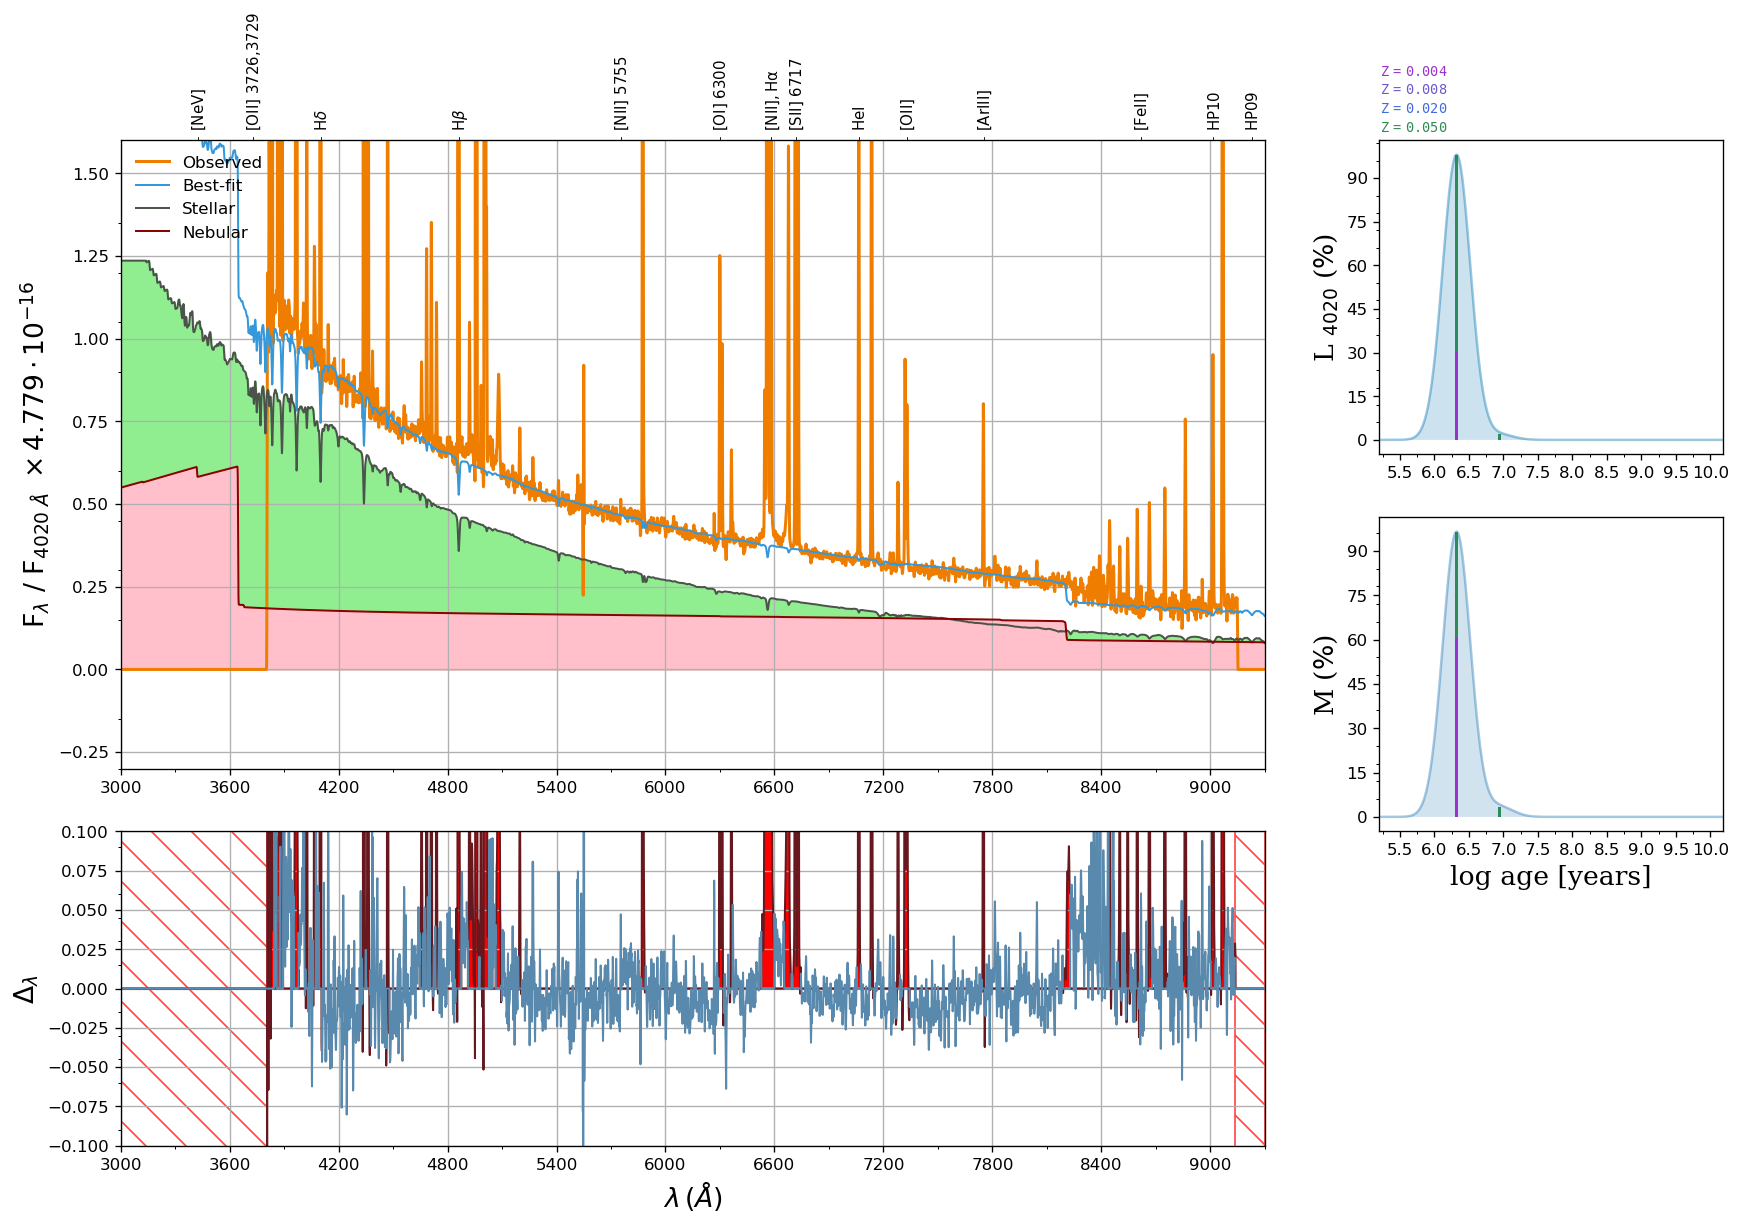

In [17]:
PlotFADO( galaxy_0266_51630_100, xmin=3000. , xmax=9300., ymin=-0.3, ymax=1.6, ymin_residual=-0.1, ymax_residual=0.1 )